In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,Conv2DTranspose,Dense

In [2]:
imgpath = 'D:\\abnormal\\category\\data\\normal'
imgfiles = os.listdir(imgpath)
x_train = np.empty((326,512,512,3))
i = 0

for file in imgfiles:
    img = cv2.imread(imgpath+'/'+file)[:,:,::-1]
    img = cv2.resize(img,(512,512))
    x_train[i] = img
    i += 1

In [3]:
x_train

array([[[[ 43.,  43.,  43.],
         [ 26.,  26.,  26.],
         [ 13.,  13.,  13.],
         ...,
         [ 32.,  32.,  32.],
         [ 32.,  32.,  32.],
         [ 35.,  35.,  35.]],

        [[ 41.,  41.,  41.],
         [ 26.,  26.,  26.],
         [ 18.,  18.,  18.],
         ...,
         [ 31.,  31.,  31.],
         [ 33.,  33.,  33.],
         [ 31.,  31.,  31.]],

        [[ 39.,  39.,  39.],
         [ 28.,  28.,  28.],
         [ 14.,  14.,  14.],
         ...,
         [ 29.,  29.,  29.],
         [ 33.,  33.,  33.],
         [ 31.,  31.,  31.]],

        ...,

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [ 70.,  70.,  70.],
         [ 72.,  72.,  72.],
         [ 71.,  71.,  71.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [ 92.,  92.,  92.],
         [ 85.,  85.,  85.],
         [ 90.,  90.,  90.]],

        [[  0.,   0.,   0.],
       

In [4]:
x_train.shape

(326, 512, 512, 3)

In [5]:
type(x_train)

numpy.ndarray

In [6]:
x_train /= 255
x_valid = x_train[300:]
x_train = x_train[:300]
x_valid = x_valid.astype('float32')
x_train = x_train.astype('float32')
print('{}\n{}'.format(len(x_train),len(x_valid)))

300
26


In [7]:
x_train

array([[[[0.16862746, 0.16862746, 0.16862746],
         [0.10196079, 0.10196079, 0.10196079],
         [0.05098039, 0.05098039, 0.05098039],
         ...,
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.13725491, 0.13725491, 0.13725491]],

        [[0.16078432, 0.16078432, 0.16078432],
         [0.10196079, 0.10196079, 0.10196079],
         [0.07058824, 0.07058824, 0.07058824],
         ...,
         [0.12156863, 0.12156863, 0.12156863],
         [0.12941177, 0.12941177, 0.12941177],
         [0.12156863, 0.12156863, 0.12156863]],

        [[0.15294118, 0.15294118, 0.15294118],
         [0.10980392, 0.10980392, 0.10980392],
         [0.05490196, 0.05490196, 0.05490196],
         ...,
         [0.11372549, 0.11372549, 0.11372549],
         [0.12941177, 0.12941177, 0.12941177],
         [0.12156863, 0.12156863, 0.12156863]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [8]:
x_valid

array([[[[0.47843137, 0.47843137, 0.47843137],
         [0.4       , 0.4       , 0.4       ],
         [0.32941177, 0.32941177, 0.32941177],
         ...,
         [0.4       , 0.4       , 0.4       ],
         [0.4       , 0.4       , 0.4       ],
         [0.43529412, 0.43529412, 0.43529412]],

        [[0.46666667, 0.46666667, 0.46666667],
         [0.4       , 0.4       , 0.4       ],
         [0.3372549 , 0.3372549 , 0.3372549 ],
         ...,
         [0.41568628, 0.41568628, 0.41568628],
         [0.41568628, 0.41568628, 0.41568628],
         [0.41960785, 0.41960785, 0.41960785]],

        [[0.47058824, 0.47058824, 0.47058824],
         [0.4       , 0.4       , 0.4       ],
         [0.32156864, 0.32156864, 0.32156864],
         ...,
         [0.4       , 0.4       , 0.4       ],
         [0.41568628, 0.41568628, 0.41568628],
         [0.4       , 0.4       , 0.4       ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [9]:
# from tensorflow.keras import layers

# class AnomalyDetector(Model):
#   def __init__(self):
#     super(AnomalyDetector, self).__init__()
#     self.encoder = tf.keras.Sequential([
#         layers.Input(shape=(512, 512, 3)),
#         layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=2),
#         layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
#         layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
#         layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
#         layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

#     self.decoder = tf.keras.Sequential([
#         layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
#         layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
#         layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
#         layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
#         layers.Conv2DTranspose(128, kernel_size=3, strides=2, activation='relu', padding='same'),
#         layers.Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')])

#   def call(self, x):
#       encoded = self.encoder(x)
#       decoded = self.decoder(encoded)
#       return decoded

# autoencoder = AnomalyDetector()

In [11]:
class TarAutoEncoder(Model):
    def __init__(self):
        super(TarAutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(2048, 2048, 3)),
            layers.Conv2D(512, (3, 3), activation='relu', padding='same', strides=2),
            layers.MaxPooling2D((2, 2), padding='same'),
            layers.Conv2D(256, (3, 3), activation='relu', padding='same', strides=2),
            layers.MaxPooling2D((2, 2), padding='same'),
            layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=2),
            layers.MaxPooling2D((2, 2), padding='same'),
            layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
            layers.MaxPooling2D((2, 2), padding='same'),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
            layers.MaxPooling2D((2, 2), padding='same'),
            layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
            layers.MaxPooling2D((2, 2), padding='same'),  
            layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),
#             layers.MaxPooling2D((2, 2), padding='same'),  
#             layers.Conv2D(4, (3, 3), activation='relu', padding='same', strides=2),
#             layers.MaxPooling2D((2, 2), padding='same'),  
#             layers.Conv2D(2, (3, 3), activation='relu', padding='same', strides=2)
        ])
        
        self.decoder = tf.keras.Sequential([
#             layers.Conv2DTranspose(2, kernel_size=3, strides=2, activation='relu', padding='same'),
#             layers.UpSampling2D((2, 2)),
#             layers.Conv2DTranspose(4, kernel_size=3, strides=2, activation='relu', padding='same'),
#             layers.UpSampling2D((2, 2)),
            layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2DTranspose(128, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')
        ])

        
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
autoencoder = TarAutoEncoder()

In [12]:
autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4

In [13]:
autoencoder.compile(optimizer='adam', loss='mae')
history = autoencoder.fit(x_train, x_train,
                          epochs=200,
                          shuffle=True,
                          validation_data=(x_valid, x_valid))

Epoch 1/200
10/10 [==============================] - 12s 629ms/step - loss: 0.2485 - val_loss: 0.2285
Epoch 2/200
10/10 [==============================] - 4s 379ms/step - loss: 0.2119 - val_loss: 0.1923
Epoch 3/200
10/10 [==============================] - 4s 372ms/step - loss: 0.1950 - val_loss: 0.1851
Epoch 4/200
10/10 [==============================] - 4s 375ms/step - loss: 0.1867 - val_loss: 0.1765
Epoch 5/200
10/10 [==============================] - 4s 368ms/step - loss: 0.1773 - val_loss: 0.1662
Epoch 6/200
10/10 [==============================] - 4s 369ms/step - loss: 0.1692 - val_loss: 0.1584
Epoch 7/200
10/10 [==============================] - 4s 368ms/step - loss: 0.1633 - val_loss: 0.1525
Epoch 8/200
10/10 [==============================] - 4s 373ms/step - loss: 0.1578 - val_loss: 0.1473
Epoch 9/200
10/10 [==============================] - 4s 372ms/step - loss: 0.1544 - val_loss: 0.1473
Epoch 10/200
10/10 [==============================] - 4s 372ms/step - loss: 0.1515 - val_l

Epoch 161/200
10/10 [==============================] - 4s 374ms/step - loss: 0.1052 - val_loss: 0.1033
Epoch 162/200
10/10 [==============================] - 4s 374ms/step - loss: 0.1052 - val_loss: 0.1038
Epoch 163/200
10/10 [==============================] - 4s 375ms/step - loss: 0.1060 - val_loss: 0.1054
Epoch 164/200
10/10 [==============================] - 4s 374ms/step - loss: 0.1065 - val_loss: 0.1056
Epoch 165/200
10/10 [==============================] - 4s 378ms/step - loss: 0.1065 - val_loss: 0.1051
Epoch 166/200
10/10 [==============================] - 4s 378ms/step - loss: 0.1059 - val_loss: 0.1034
Epoch 167/200
10/10 [==============================] - 4s 376ms/step - loss: 0.1053 - val_loss: 0.1030
Epoch 168/200
10/10 [==============================] - 4s 377ms/step - loss: 0.1051 - val_loss: 0.1034
Epoch 169/200
10/10 [==============================] - 4s 376ms/step - loss: 0.1049 - val_loss: 0.1030
Epoch 170/200
10/10 [==============================] - 4s 374ms/step - lo

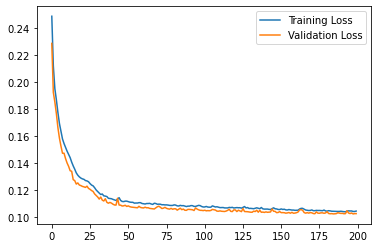

In [14]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.savefig('autoencoder_loss.jpg')

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [16]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [17]:
reconstructions = autoencoder.predict(x_train)
train_loss = tf.keras.losses.mae(reconstructions, x_train)
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.22236362


In [18]:
autoencoder.encoder.save('./saved_model/untar_encoder.h5')
autoencoder.decoder.save('./saved_model/untar_decoder.h5')

In [19]:
load_encoder = tf.keras.models.load_model('./saved_model/untar_encoder.h5')

In [20]:
x_valid[0]

array([[[0.47843137, 0.47843137, 0.47843137],
        [0.4       , 0.4       , 0.4       ],
        [0.32941177, 0.32941177, 0.32941177],
        ...,
        [0.4       , 0.4       , 0.4       ],
        [0.4       , 0.4       , 0.4       ],
        [0.43529412, 0.43529412, 0.43529412]],

       [[0.46666667, 0.46666667, 0.46666667],
        [0.4       , 0.4       , 0.4       ],
        [0.3372549 , 0.3372549 , 0.3372549 ],
        ...,
        [0.41568628, 0.41568628, 0.41568628],
        [0.41568628, 0.41568628, 0.41568628],
        [0.41960785, 0.41960785, 0.41960785]],

       [[0.47058824, 0.47058824, 0.47058824],
        [0.4       , 0.4       , 0.4       ],
        [0.32156864, 0.32156864, 0.32156864],
        ...,
        [0.4       , 0.4       , 0.4       ],
        [0.41568628, 0.41568628, 0.41568628],
        [0.4       , 0.4       , 0.4       ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [21]:
tar = load_encoder(x_valid)

In [22]:
tar

<tf.Tensor: shape=(26, 1, 1, 8), dtype=float32, numpy=
array([[[[30.069407 ,  0.       ,  0.       , 35.08493  ,  0.       ,
           0.       , 10.593007 , 25.348541 ]]],


       [[[32.31512  ,  0.       ,  0.       , 31.568275 ,  0.       ,
           0.       , 13.54235  , 20.370378 ]]],


       [[[20.578207 ,  0.       ,  0.       , 20.825321 ,  0.       ,
           0.       ,  5.6223454, 26.327078 ]]],


       [[[26.992529 ,  0.       ,  0.       , 25.729515 ,  0.       ,
           0.       ,  9.654528 , 25.395878 ]]],


       [[[31.310493 ,  0.       ,  0.       , 22.988861 ,  0.       ,
           0.       , 11.255538 , 24.986782 ]]],


       [[[36.610676 ,  0.       ,  0.       , 22.557203 ,  0.       ,
           0.       , 16.18159  , 15.006612 ]]],


       [[[27.844097 ,  0.       ,  0.       , 29.891993 ,  0.       ,
           0.       , 17.38746  , 20.939976 ]]],


       [[[33.544846 ,  0.       ,  0.       , 34.958714 ,  0.       ,
           0.       , 11.495

In [23]:
tar[0]

<tf.Tensor: shape=(1, 1, 8), dtype=float32, numpy=
array([[[30.069407,  0.      ,  0.      , 35.08493 ,  0.      ,
          0.      , 10.593007, 25.348541]]], dtype=float32)>